# **EDA**

Data Minions

In [82]:
from google.colab import auth
auth.authenticate_user()

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")

In [84]:
from google.cloud import bigquery
import pandas as pd

project_id = "big-data-crypto-sentiment-test"
client = bigquery.Client(project=project_id)

In [85]:
query_fix_prices = """
CREATE OR REPLACE TABLE `big-data-crypto-sentiment-test.crypto_analysis.raw_prices_fixed` AS
SELECT
  symbol,
  price,
  TIMESTAMP_MILLIS(CAST(timestamp AS INT64)) AS timestamp
FROM `big-data-crypto-sentiment-test.crypto_analysis.raw_prices`;
"""

client.query(query_fix_prices).result()


In [86]:
query_check = """
SELECT
  MIN(timestamp) AS min_timestamp,
  MAX(timestamp) AS max_timestamp
FROM `big-data-crypto-sentiment-test.crypto_analysis.raw_prices_fixed`;
"""

client.query(query_check).to_dataframe()

,min_timestamp,max_timestamp
0,2025-11-23 21:41:44.894000+00:00,2026-01-25 18:52:56.065000+00:00


In [87]:

query_tweets = """
SELECT *
FROM `big-data-crypto-sentiment-test.crypto_analysis.raw_tweets`
"""

df_tweets = client.query(query_tweets).to_dataframe()

In [88]:
df_tweets.head()

,id,text,author_id,crypto_key,created_at_raw,created_at_iso,timestamp_ms,timestamp_sec
0,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:48:37.140544+00:00,1763934517140,1758597013
1,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:41:52.641150+00:00,1763934112641,1758597013
2,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:42:18.218113+00:00,1763934138218,1758597013
3,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:48:06.962910+00:00,1763934486962,1758597013
4,1970324796761412076,Entdecke die Herbst Must-haves,3823848513,ETH,Tue Sep 23 03:10:13 +0000 2025,2025-11-23 21:43:57.325803+00:00,1763934237325,1758597013


In [89]:

query_prices = """
SELECT *
FROM `big-data-crypto-sentiment-test.crypto_analysis.raw_prices_fixed`
"""

df_prices = client.query(query_prices).to_dataframe()

In [90]:
df_prices.head()

,symbol,price,timestamp
0,ETH,2624.840736,2026-01-25 18:06:43.799000+00:00
1,ETH,2660.756513,2026-01-25 18:11:16.417000+00:00
2,ETH,2833.052722,2026-01-25 18:25:55.027000+00:00
3,ETH,2738.734132,2026-01-25 18:26:25.322000+00:00
4,ETH,2871.812625,2026-01-25 18:45:06.479000+00:00


In [91]:


query_joined = """
SELECT *
FROM `big-data-crypto-sentiment-test.crypto_analysis.crypto_prices_with_tweets`
"""

df_joined = client.query(query_joined).to_dataframe()

In [92]:
df_joined.head()

,event_timestamp,symbol,tweet_volume,avg_price,last_price,tweet_texts
0,2026-01-23 19:20:30+00:00,SOL,0,125.077467,125.077467,[]
1,2026-01-23 19:20:30+00:00,ETH,0,2674.032867,2674.032867,[]
2,2026-01-23 19:20:30+00:00,SHIB,0,0.000008,0.000008,[]
3,2026-01-23 19:20:30+00:00,FTM,0,0.111202,0.111202,[]
4,2026-01-23 19:21:00+00:00,SOL,0,132.479744,131.664835,[]


# Dataset Overview

## Tweets

In [93]:
df_tweets.shape

(12779, 8)

In [94]:
df_tweets.columns

Index(['id', 'text', 'author_id', 'crypto_key', 'created_at_raw',
       'created_at_iso', 'timestamp_ms', 'timestamp_sec'],
      dtype='object')

In [95]:
cutoff_time1 = pd.Timestamp("2025-12-24 12:00:00", tz="UTC") # od 12:00 22.12 zmienić,wczesniej syntetyczne
df_tweets = df_tweets[df_tweets["created_at_iso"] >= cutoff_time1].copy()

cutoff_time2 = pd.Timestamp("2025-12-31 12:00:00", tz="UTC") # od 12:00 22.12 zmienić,wczesniej syntetyczne
df_tweets = df_tweets[df_tweets["created_at_iso"] <= cutoff_time2].copy()

In [96]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3113 entries, 8817 to 11929
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              3113 non-null   object             
 1   text            3113 non-null   object             
 2   author_id       3113 non-null   object             
 3   crypto_key      3113 non-null   object             
 4   created_at_raw  3113 non-null   object             
 5   created_at_iso  3113 non-null   datetime64[us, UTC]
 6   timestamp_ms    3113 non-null   Int64              
 7   timestamp_sec   3113 non-null   Int64              
dtypes: Int64(2), datetime64[us, UTC](1), object(5)
memory usage: 225.0+ KB


In [97]:
df_tweets["created_at_iso"] = pd.to_datetime(df_tweets["created_at_iso"])

In [98]:
df_tweets["created_at_iso"].min(), df_tweets["created_at_iso"].max()

(Timestamp('2025-12-28 14:00:20.726248+0000', tz='UTC'),
 Timestamp('2025-12-28 14:40:25.180100+0000', tz='UTC'))

/tmp/ipython-input-457310650.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample("T")


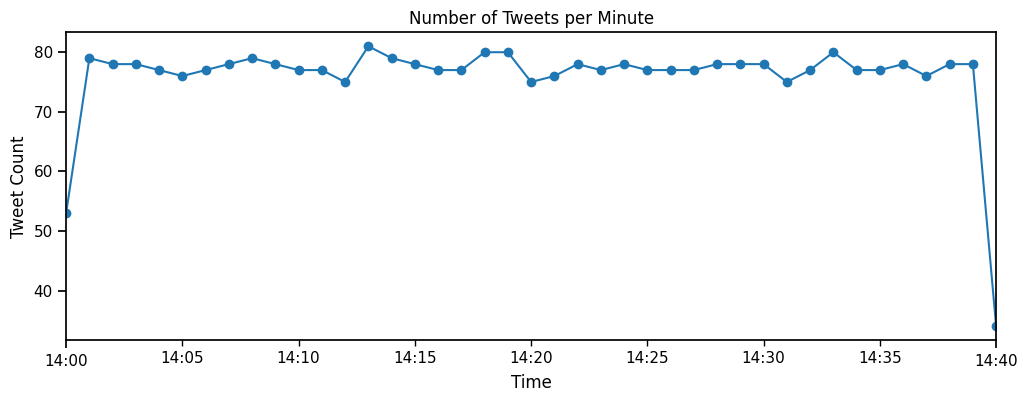

In [99]:
tweets_per_minute = (
    df_tweets
    .set_index("created_at_iso")
    .resample("T")
    .size()
)

tweets_per_minute.plot(figsize=(12, 4), marker="o")
plt.title("Number of Tweets per Minute")
plt.xlabel("Time")
plt.ylabel("Tweet Count")
plt.show()

/tmp/ipython-input-516016634.py:4: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("10S")


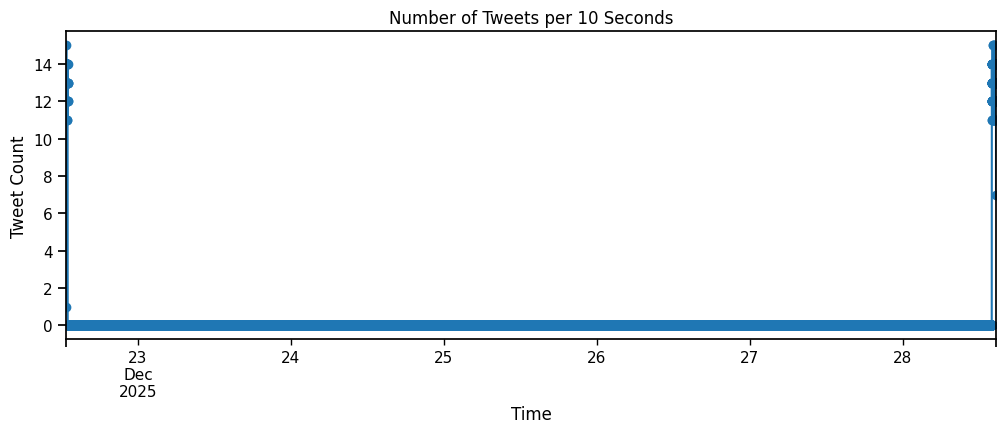

In [81]:
tweets_per_10s = (
    df_tweets
    .set_index("created_at_iso")
    .resample("10S")
    .size()
)

tweets_per_10s.plot(figsize=(12, 4), marker="o")
plt.title("Number of Tweets per 10 Seconds")
plt.xlabel("Time")
plt.ylabel("Tweet Count")
plt.show()

In [100]:
tweets_per_crypto = (
    df_tweets["crypto_key"]
    .value_counts()
    .reset_index()
)

tweets_per_crypto.columns = ["cryptocurrency", "tweet_count"]
tweets_per_crypto

,cryptocurrency,tweet_count
0,ETH,792
1,SHIB,790
2,FTM,785
3,SOL,746


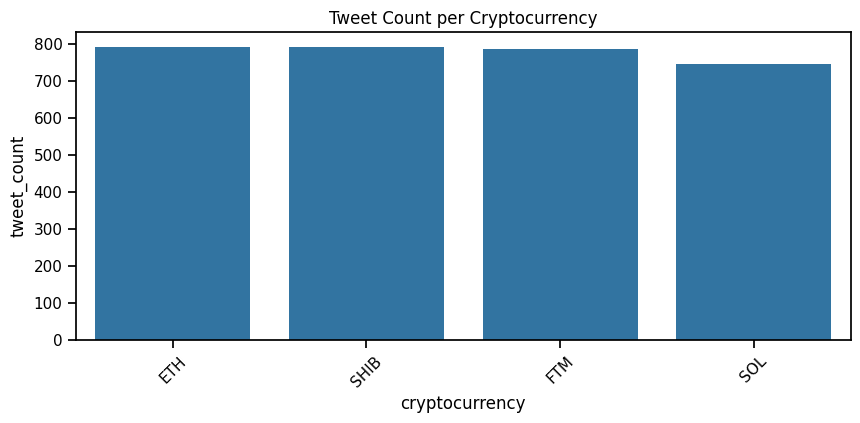

In [101]:
plt.figure(figsize=(10, 4))
sns.barplot(
    data=tweets_per_crypto,
    x="cryptocurrency",
    y="tweet_count"
)
plt.title("Tweet Count per Cryptocurrency")
plt.xticks(rotation=45)
plt.show()

In [102]:
df_tweets["text_length"] = df_tweets["text"].str.len()

In [103]:
df_tweets["text_length"].describe()

,text_length
count,3113.000000
mean,182.405397
std,145.477229
min,30.000000
25%,72.000000
50%,171.000000
75%,233.000000
max,701.000000


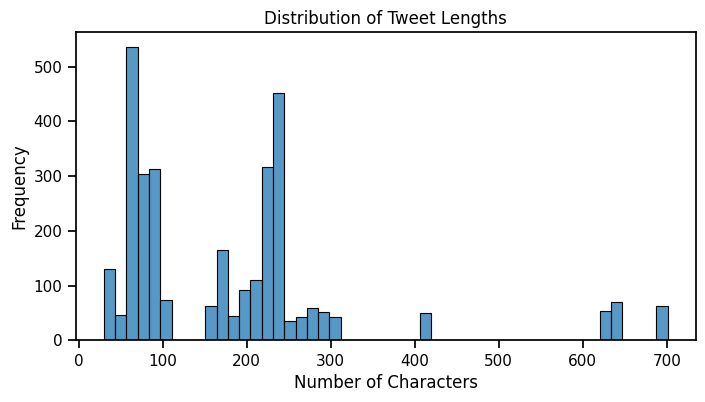

In [104]:
plt.figure(figsize=(8, 4))
sns.histplot(df_tweets["text_length"], bins=50)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

In [105]:
(df_tweets["text_length"] < 10).mean()

np.float64(0.0)

In [106]:
# most active authors
top_authors = (
    df_tweets["author_id"]
    .value_counts()
    .head(10)
)

top_authors

,count
author_id,
271794902,607
1829520318425382912,178
1901534065271992320,136
3823848513,131
1292254233593622529,112
1471268839388323849,110
1617775886065094658,74
1749429885993455616,70
115584400,64


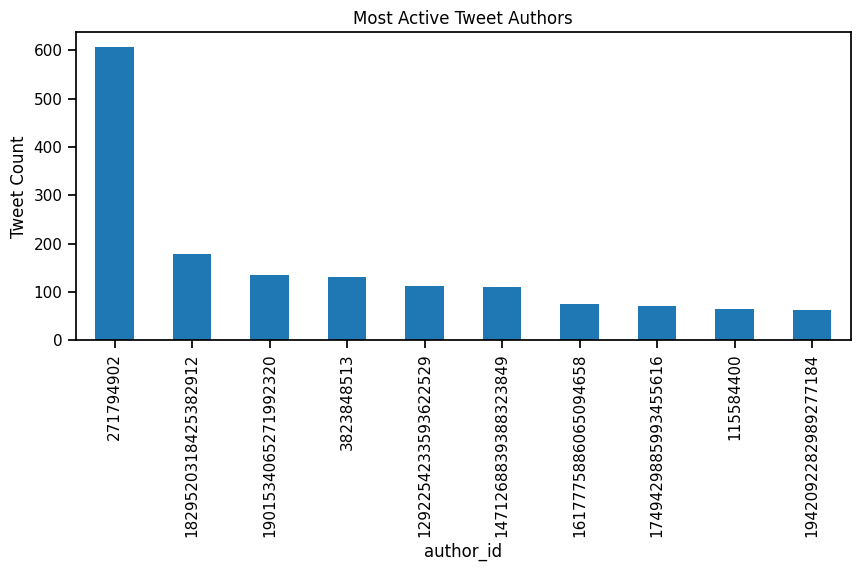

In [107]:
top_authors.plot(kind="bar", figsize=(10, 4))
plt.title("Most Active Tweet Authors")
plt.ylabel("Tweet Count")
plt.show()

## Cryptocurrency

In [108]:
df_prices.shape

(3444, 3)

In [109]:
df_prices.columns

Index(['symbol', 'price', 'timestamp'], dtype='object')

In [110]:
df_prices = df_prices[df_prices["timestamp"] >= cutoff_time].copy()

In [111]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1700 entries, 0 to 3436
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   symbol     1700 non-null   object             
 1   price      1700 non-null   float64            
 2   timestamp  1700 non-null   datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), float64(1), object(1)
memory usage: 53.1+ KB


In [112]:
df_prices["timestamp"].head(10)

,timestamp
0,2026-01-25 18:06:43.799000+00:00
1,2026-01-25 18:11:16.417000+00:00
2,2026-01-25 18:25:55.027000+00:00
3,2026-01-25 18:26:25.322000+00:00
4,2026-01-25 18:45:06.479000+00:00
5,2026-01-25 18:49:08.902000+00:00
8,2025-12-28 14:36:54.716000+00:00
9,2025-12-28 14:27:04.679000+00:00
10,2025-12-28 14:39:41.134000+00:00
11,2025-12-28 14:19:15.818000+00:00


In [113]:
df_prices["timestamp"].describe()

,timestamp
count,1700
mean,2026-01-10 08:44:32.062774+00:00
min,2025-12-22 12:42:09.992000+00:00
25%,2025-12-28 14:11:57.083000+00:00
50%,2025-12-28 14:38:40.600000+00:00
75%,2026-01-25 18:26:10.170000+00:00
max,2026-01-25 18:52:56.065000+00:00


In [114]:
df_prices.isna().sum()

,0
symbol,0
price,0
timestamp,0


In [115]:
df_prices["timestamp"] = pd.to_datetime(
    df_prices["timestamp"],
    unit="s"
)

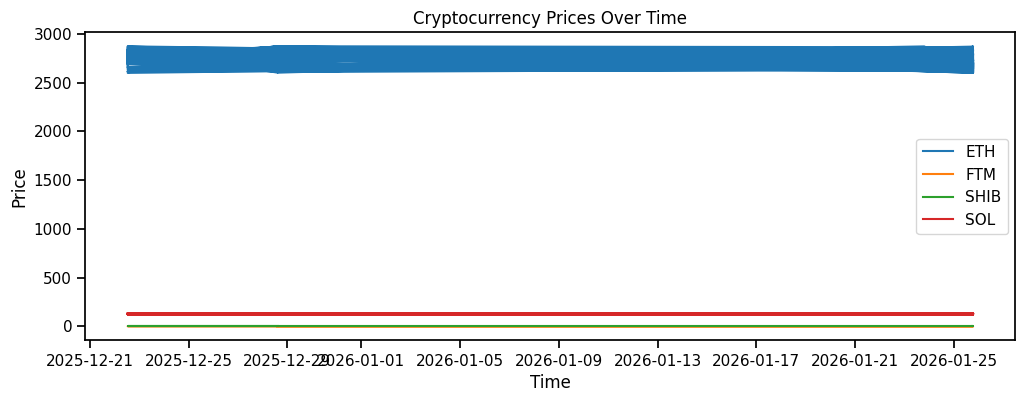

In [116]:
plt.figure(figsize=(12, 4))

for symbol in df_prices["symbol"].unique():
    subset = df_prices[df_prices["symbol"] == symbol]
    plt.plot(
        subset["timestamp"],
        subset["price"],
        label=symbol
    )

plt.legend()
plt.title("Cryptocurrency Prices Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [117]:
# price changes
df_prices = df_prices.sort_values(
    ["symbol", "timestamp"]
)

df_prices["price_change"] = (
    df_prices
    .groupby("symbol")["price"]
    .diff()
)
df_prices.groupby("symbol")["price_change"].describe()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
ETH,424.0,-2.041467e-01,1.172067e+02,-2.544576e+02,-8.450825e+01,5.171873e+00,8.601867e+01,2.463480e+02
FTM,424.0,1.487072e-05,4.429935e-03,-1.022279e-02,-3.049647e-03,-1.582251e-04,3.335997e-03,1.000683e-02
SHIB,424.0,-1.440344e-10,3.118897e-07,-7.342090e-07,-2.255297e-07,-9.903244e-09,2.199520e-07,7.085537e-07
SOL,424.0,1.417675e-02,5.368533e+00,-1.221137e+01,-3.711100e+00,-7.304000e-02,3.769007e+00,1.214227e+01


## Relationship Between Tweets and Prices

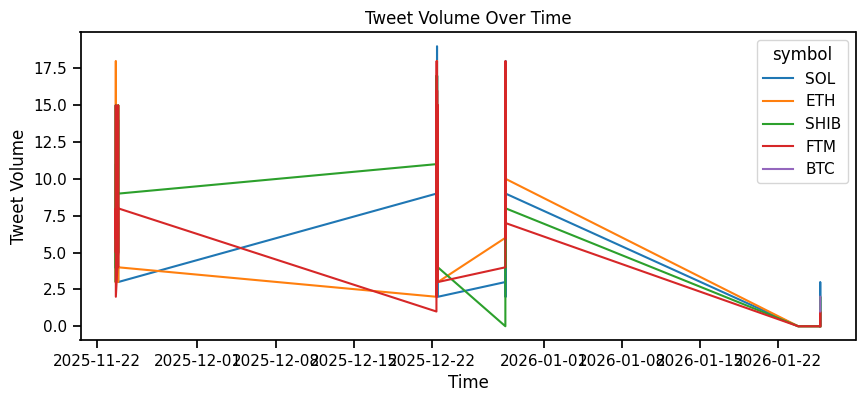

In [118]:
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=df_joined,
    x="event_timestamp",
    y="tweet_volume",
    hue="symbol"
)
plt.title("Tweet Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Tweet Volume")
plt.show()


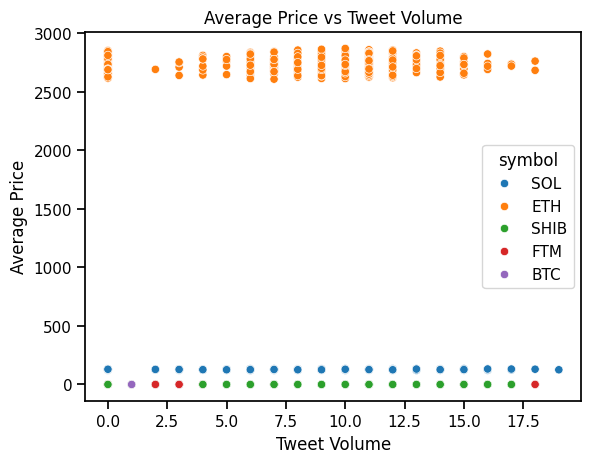

In [119]:
sns.scatterplot(
    data=df_joined,
    x="tweet_volume",
    y="avg_price",
    hue="symbol"
)
plt.title("Average Price vs Tweet Volume")
plt.xlabel("Tweet Volume")
plt.ylabel("Average Price")
plt.show()

In [120]:
df_joined[["tweet_volume", "avg_price"]].corr()

,tweet_volume,avg_price
tweet_volume,1.000000,0.014323
avg_price,0.014323,1.000000


## Price volatility vs tweet volume

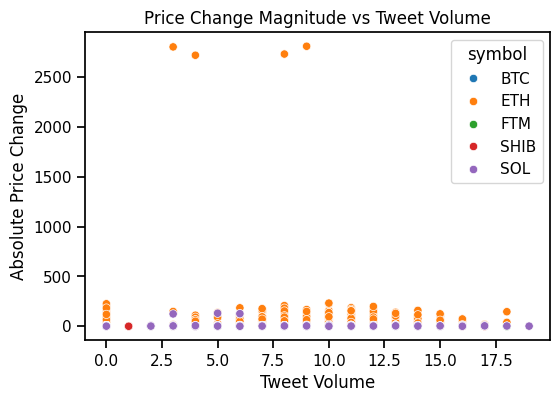

In [121]:
df_joined = df_joined.sort_values(["symbol", "event_timestamp"])

df_joined["price_change"] = (
    df_joined
    .groupby("symbol")["avg_price"]
    .diff()
    .abs()
)

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_joined,
    x="tweet_volume",
    y="price_change",
    hue="symbol"
)
plt.title("Price Change Magnitude vs Tweet Volume")
plt.xlabel("Tweet Volume")
plt.ylabel("Absolute Price Change")
plt.show()


## Distribution of tweet volume per symbol

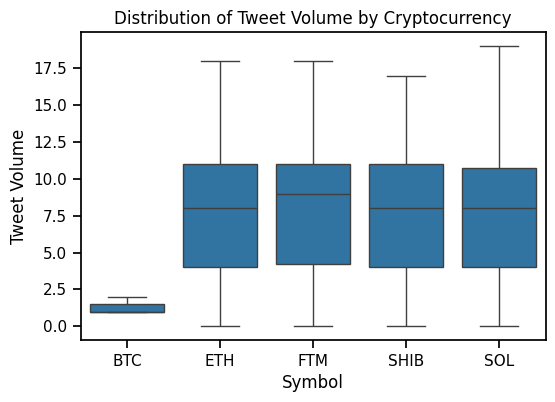

In [122]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_joined,
    x="symbol",
    y="tweet_volume"
)
plt.title("Distribution of Tweet Volume by Cryptocurrency")
plt.xlabel("Symbol")
plt.ylabel("Tweet Volume")
plt.show()

## Price dispersion across symbols

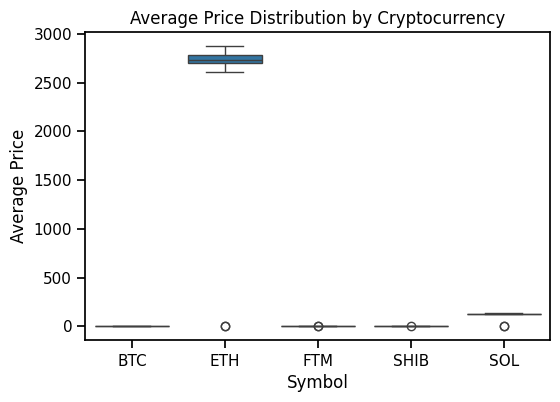

In [123]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_joined,
    x="symbol",
    y="avg_price"
)
plt.title("Average Price Distribution by Cryptocurrency")
plt.xlabel("Symbol")
plt.ylabel("Average Price")
plt.show()


# normalised price changes

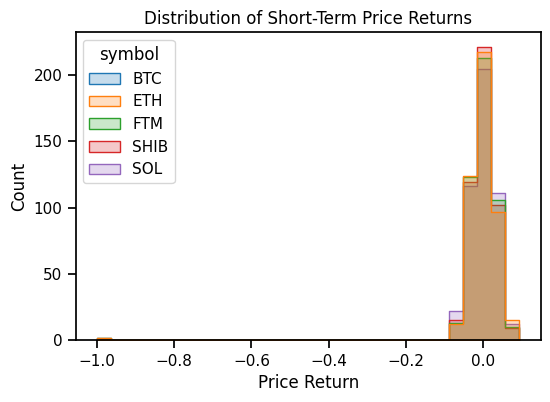

In [124]:
df_joined["price_return"] = (
    df_joined
    .groupby("symbol")["avg_price"]
    .pct_change()
)

plt.figure(figsize=(6, 4))
sns.histplot(
    data=df_joined,
    x="price_return",
    hue="symbol",
    bins=30,
    element="step"
)
plt.title("Distribution of Short-Term Price Returns")
plt.xlabel("Price Return")
plt.show()


## lagged tweet volume vs price change

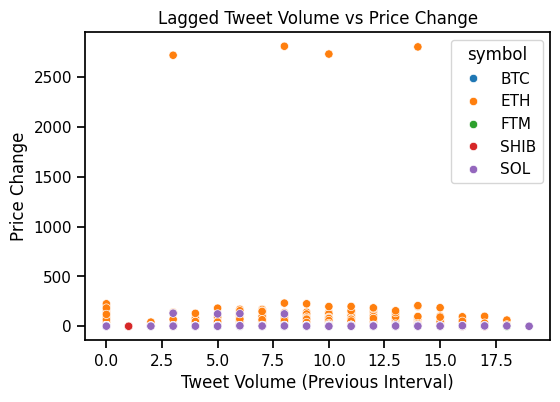

In [125]:
df_joined["tweet_volume_lag1"] = (
    df_joined
    .groupby("symbol")["tweet_volume"]
    .shift(1)
)

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_joined,
    x="tweet_volume_lag1",
    y="price_change",
    hue="symbol"
)
plt.title("Lagged Tweet Volume vs Price Change")
plt.xlabel("Tweet Volume (Previous Interval)")
plt.ylabel("Price Change")
plt.show()


## correlation by symbol

In [126]:
for symbol in df_joined["symbol"].unique():
    corr = df_joined[df_joined["symbol"] == symbol][
        ["tweet_volume", "avg_price"]
    ].corr().iloc[0,1]
    print(symbol, corr)

BTC nan
ETH 0.021480366712517816
FTM 0.043923910667521784
SHIB 0.02885049967588238
SOL 0.04140954259566795


## correlation with prices changes (not level)

In [127]:
for symbol in df_joined["symbol"].unique():
    subset = df_joined[df_joined["symbol"] == symbol]
    corr = subset[["tweet_volume", "price_change"]].corr().iloc[0,1]
    print(symbol, corr)

BTC nan
ETH -0.029790609853375817
FTM -0.042198009089655264
SHIB -0.027996010513856365
SOL -0.030999388793950703
